# Segmentación con K-Means
## AA3 – Interpretación de Clústeres

### Proposito
El objetivo de este notebook es interpretar los grupos encontrados y observar cómo cambian los resultados al variar K, todo esto documentado paso a paso en español y listo para ser ejecutado en Google Colab.

### Introduccion
En este notebook se realiza la interpretación de los clústeres generados con el algoritmo K-Means.  
Se explora cómo se agrupan los clientes visualmente, se analizan las características de cada clúster y se comparan los resultados obtenidos al cambiar el número de clústeres (K).

### Importación de librerías necesarias

In [1]:
# Importamos las librerías requeridas para visualización y modelado
import pandas as pd                     # Para manipulación de datos tabulares
import numpy as np                      # Para operaciones numéricas
import matplotlib.pyplot as plt         # Para gráficos
import seaborn as sns                   # Para visualización estadística
from sklearn.cluster import KMeans      # Algoritmo de agrupamiento no supervisado
from sklearn.preprocessing import StandardScaler  # Para normalización de datos

### Cargar el conjunto de datos desde Google Drive

In [2]:
# Cargamos el archivo Mall_Customers.csv desde Google Drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Autenticamos al usuario con su cuenta de Google
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Especificamos el ID del archivo en Drive
file_id = '1f5B2kMAA7MY33-r1dyko5NYCkEXLNRda'
archivo = drive.CreateFile({'id': file_id})
archivo.GetContentFile('Mall_Customers.csv')

# Cargamos el archivo CSV en un DataFrame
df = pd.read_csv('Mall_Customers.csv')
df.head()  # Mostramos las primeras filas del dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Preparación y escalamiento de los datos

In [3]:
# Seleccionamos únicamente las variables numéricas que usaremos para el agrupamiento
df_modelo = df.drop(['CustomerID', 'Gender'], axis=1)

# Escalamos los datos para que todas las variables estén en la misma escala
escalador = StandardScaler()
datos_escalados = escalador.fit_transform(df_modelo)

### Aplicación del modelo K-Means con K=5

In [4]:
# Entrenamos el modelo K-Means con 5 clústeres (valor obtenido previamente con el método del codo)
modelo_k5 = KMeans(n_clusters=5, random_state=42)

# Ajustamos el modelo y predecimos a qué clúster pertenece cada cliente
df['Cluster_K5'] = modelo_k5.fit_predict(datos_escalados)

# Mostramos los primeros registros con la etiqueta de clúster asignada
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster_K5']].head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster_K5
0,19,15,39,2
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,2


### Visualización de clústeres con K=5

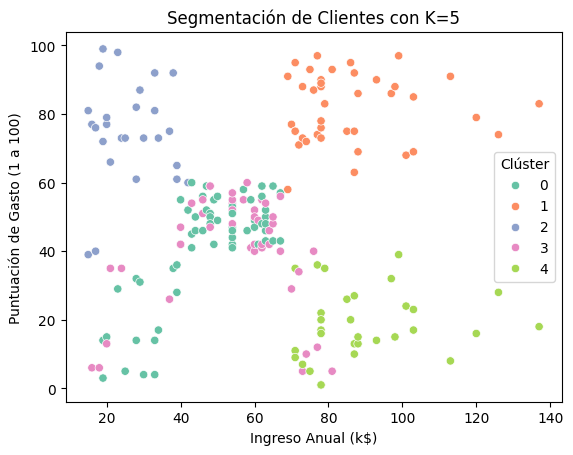

In [5]:
# Graficamos los clústeres según Ingreso Anual vs Puntuación de Gasto
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster_K5',
    palette='Set2',
    data=df
)
plt.title('Segmentación de Clientes con K=5')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1 a 100)')
plt.legend(title='Clúster')
plt.show()

### Comparación con otros valores de K (K=3 y K=6)

In [6]:
# Entrenamos el modelo con K=3
modelo_k3 = KMeans(n_clusters=3, random_state=42)
df['Cluster_K3'] = modelo_k3.fit_predict(datos_escalados)

# Entrenamos el modelo con K=6
modelo_k6 = KMeans(n_clusters=6, random_state=42)
df['Cluster_K6'] = modelo_k6.fit_predict(datos_escalados)

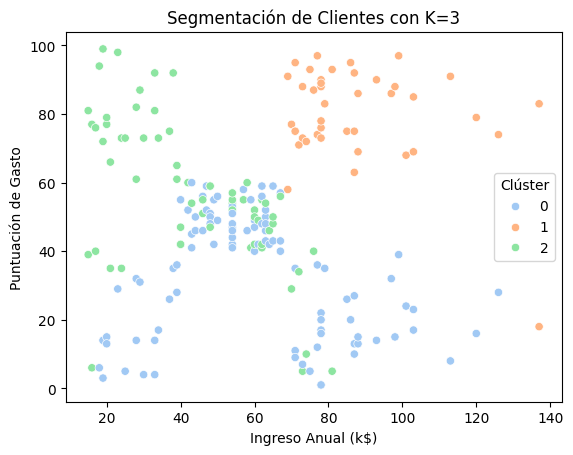

In [7]:
# Visualización con K=3
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster_K3',
    palette='pastel',
    data=df
)
plt.title('Segmentación de Clientes con K=3')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto')
plt.legend(title='Clúster')
plt.show()

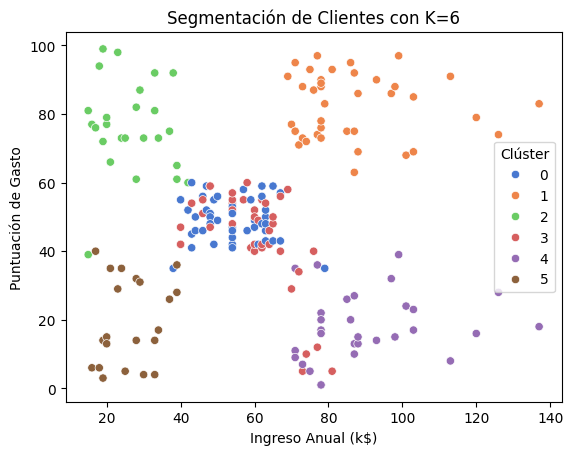

In [8]:
# Visualización con K=6
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster_K6',
    palette='muted',
    data=df
)
plt.title('Segmentación de Clientes con K=6')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto')
plt.legend(title='Clúster')
plt.show()

### Análisis descriptivo de los clústeres (K=5)

In [9]:
# Calculamos el promedio de las variables numéricas por clúster
df.groupby('Cluster_K5')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster_K5,,,
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871


## Conclusiones

    -> Con K=5, los clústeres presentan grupos bien diferenciados en términos de ingreso y gasto.
    -> Al usar K=3, los clústeres son más amplios y generales, lo cual puede ocultar patrones importantes.
    -> Al usar K=6, algunos clústeres tienden a solaparse o dividirse innecesariamente.
    -> Se recomienda utilizar el método del codo como guía y luego validar gráficamente si el número de clústeres refleja segmentaciones útiles y comprensibles.
    -> Este tipo de análisis permite a las empresas clasificar a sus clientes y tomar decisiones personalizadas por grupo.

Este análisis visual complementa el modelado anterior y permite una interpretación clara de los patrones encontrados.
